In [ ]:
from autometrics.dataset.datasets.simplification import SimpDA
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
from autometrics.aggregator.regression import Ridge
from autometrics.metrics.MetricBank import all_metrics
import dspy
import litellm
import pandas as pd
pd.set_option('display.max_columns', None)

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = SimpDA()

In [3]:
dataset.add_metrics(all_metrics)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 41/41 [01:07<00:00,  1.64s/it]


computing greedy matching.


100%|██████████| 68/68 [00:00<00:00, 181.08it/s]


done in 67.64 seconds, 64.17 sentences/sec


In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Given a complicated original sentence, simplify it in a way such that a broader audience could easily understand it.", proposer_model=llama31_70b, judge_api_base="http://jagupard33:8000/v1")

In [7]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [8]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column))

In [9]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [10]:
for metric in new_metrics_final:
    metric.display()

,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Simplification of vocabulary**: The model's ability to replace complex vocabulary with simpler alternatives.,"A score of 1 indicates that the model fails to simplify complex vocabulary. The output text contains the same complex words and phrases as the original text, making it difficult for a broader audience to understand.","A score of 2 indicates that the model attempts to simplify complex vocabulary but does so incorrectly. The output text contains oversimplified or inaccurate replacements of complex words and phrases, which can alter the original meaning.","A score of 3 indicates that the model partially simplifies complex vocabulary. The output text contains some simplified words and phrases, but others remain complex. The model shows some understanding of simplification but lacks consistency.","A score of 4 indicates that the model successfully simplifies most complex vocabulary. The output text contains simplified words and phrases that maintain the original meaning. However, there may be some minor errors or instances where complex vocabulary is not fully simplified.","A score of 5 indicates that the model excels at simplifying complex vocabulary. The output text contains accurate and effective simplifications of complex words and phrases, making it easily understandable by a broader audience. The model demonstrates a strong ability to identify and replace complex vocabulary while preserving the original meaning."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Preservation of original meaning**: The ability of the model to preserve the original meaning of the sentence while simplifying it.,A score of 1 indicates that the simplified sentence has completely lost the original meaning. The output is either unrelated to the original sentence or introduces new information that changes the intended meaning.,"A score of 2 indicates that the simplified sentence has partially lost the original meaning. While some core information is preserved, significant details or nuances are missing, or the output introduces minor inaccuracies that affect the overall meaning.","A score of 3 indicates that the simplified sentence has mostly preserved the original meaning, but with some minor issues. The output may lack some details or contain minor inaccuracies, but the core information and ideas are still intact.","A score of 4 indicates that the simplified sentence has well-preserved the original meaning. The output accurately conveys the core information and ideas of the original sentence, with only minor and insignificant changes.","A score of 5 indicates that the simplified sentence has perfectly preserved the original meaning. The output is a clear and accurate simplification of the original sentence, conveying all the necessary information and ideas without any changes or inaccuracies."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Simplification of sentence structure**: The model's ability to break down complex sentence structures into simpler ones.,"A score of 1 indicates that the simplified sentence is completely unrelated to the original sentence or does not convey any meaningful information. The sentence may be incomplete, grammatically incorrect, or lack any connection to the original sentence's meaning.","A score of 2 indicates that the simplified sentence is partially related to the original sentence but fails to convey the main idea or key information. The sentence may be incomplete, contain errors, or lack clarity, making it difficult to understand the intended meaning.",A score of 3 indicates that the simplified sentence conveys some of the original sentence's meaning but lacks important details or context. The sentence may be somewhat simplified but still contains complex structures or vocabulary that make it difficult to understand.,"A score of 4 indicates that the simplified sentence effectively conveys the main idea and key information of the original sentence. The sentence is simplified, clear, and easy to understand, but may still contain some minor errors or complexities.","A score of 5 indicates that the simplified sentence perfectly conveys the original sentence's meaning in a clear, concise, and easy-to-understand manner. The sentence is well-structured, free of errors, and uses basic vocabulary, making it accessible to a broader audience."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Relevance to the original sentence**: The model's ability to produce output sentences that are relevant to the original sentence.,"A score of 1 indicates that the output sentence is completely unrelated to the original sentence. The output sentence may be about a different topic, or it may not convey any meaningful information. This score suggests that the model has failed to understand the original sentence or has not attempted to simplify it.","A score of 2 indicates that the output sentence is partially related to the original sentence, but it lacks key information or conveys a different meaning. The output sentence may capture some aspects of the original sentence, but it is incomplete or inaccurate. This score suggests that the model has made some effort to simplify the original sentence, but it needs to improve its understanding of the content.","A score of 3 indicates that the output sentence is somewhat relevant to the original sentence, but it may contain some inaccuracies or omissions. The output sentence conveys the general idea of the original sentence, but it may lack important details or nuance. This score suggests that the model has made a reasonable attempt to simplify the original sentence, but it needs to refine its understanding of the content.","A score of 4 indicates that the output sentence is mostly relevant to the original sentence, with only minor inaccuracies or omissions. The output sentence conveys the essential information and ideas of the original sentence, but it may lack some subtlety or precision. This score suggests that the model has successfully simplified the original sentence while preserving its key elements.","A score of 5 indicates that the output sentence is highly relevant to the original sentence, conveying the same meaning and information in a simplified way. The output sentence is accurate, complete, and easy to understand, demonstrating a strong understanding of the original sentence. This score suggests that the model has excelled in simplifying the original sentence while preserving its essential content."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Grammatical correctness**: The model's ability to produce grammatically correct output sentences.,"A score of 1 is given when the output sentence is completely ungrammatical, making it difficult or impossible to understand. The sentence may lack a clear subject-verb-object structure, contain multiple grammatical errors, or be missing essential words or phrases.","A score of 2 is given when the output sentence contains significant grammatical errors that hinder its clarity and readability. The sentence may have a clear subject-verb-object structure, but contains errors in verb tense, subject-verb agreement, or word order.","A score of 3 is given when the output sentence contains some grammatical errors, but is still understandable. The sentence may have a clear subject-verb-object structure, but contains errors in punctuation, word choice, or sentence structure.","A score of 4 is given when the output sentence is mostly grammatically correct, but contains minor errors that do not significantly impact its clarity. The sentence may have a clear subject-verb-object structure, but contains small errors in verb tense, subject-verb agreement, or word order.","A score of 5 is given when the output sentence is perfectly grammatical, clear, and well-formed. The sentence has a clear subject-verb-object structure, correct verb tense, subject-verb agreement, and word order, and is free of grammatical errors."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Avoidance of misinterpretation**: The ability to avoid misinterpreting the original sentence and producing an output that is unrelated to the original meaning.,"A score of 1 indicates that the simplified sentence is completely unrelated to the original sentence, or that it introduces new information that is not present in the original sentence. This suggests a complete misinterpretation of the original meaning.","A score of 2 indicates that the simplified sentence is partially unrelated to the original sentence, or that it introduces some new information that is not present in the original sentence. This suggests a significant misinterpretation of the original meaning, although some aspects of the original sentence may still be preserved.","A score of 3 indicates that the simplified sentence is somewhat related to the original sentence, but it may introduce some ambiguity or confusion. This suggests a moderate level of misinterpretation, although the core information of the original sentence may still be preserved.","A score of 4 indicates that the simplified sentence is mostly related to the original sentence, with only minor errors or ambiguities. This suggests a low level of misinterpretation, and the simplified sentence is generally accurate and clear.","A score of 5 indicates that the simplified sentence is entirely accurate and clear, with no misinterpretation of the original meaning. The simplified sentence preserves the core information and tone of the original sentence, and is easy to comprehend."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity and concision**: The ability to express the original idea in a clear and concise manner, avoiding ambiguity and unnecessary complexity.","A score of 1 indicates that the simplified sentence is completely unclear or unrelated to the original sentence. The sentence may be missing crucial information, contain irrelevant details, or be grammatically incorrect.","A score of 2 indicates that the simplified sentence is somewhat unclear or lacks concision. The sentence may contain some irrelevant details, be wordy, or have minor grammatical errors. However, the original meaning is still partially preserved.","A score of 3 indicates that the simplified sentence is clear but lacks concision. The sentence may be wordy or contain some unnecessary details, but the original meaning is still preserved. Minor grammatical errors may be present.","A score of 4 indicates that the simplified sentence is clear and concise, but may contain minor errors or omissions. The sentence effectively conveys the original meaning, but may lack some nuance or detail.","A score of 5 indicates that the simplified sentence is both clear and concise, effectively conveying the original meaning without any errors or omissions. The sentence is well-structured, easy to understand, and free of unnecessary complexity."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Relevance to context**: The ability to understand the context in which the original sentence is being used and to produce a simplified output that is relevant to that context.,"A score of 1 indicates that the simplified output is completely irrelevant to the context of the original sentence. The output may be grammatically correct and easy to understand, but it does not relate to the original sentence or the context in which it is being used.","A score of 2 indicates that the simplified output is somewhat relevant to the context of the original sentence, but it contains significant errors or inaccuracies. The output may capture some of the main ideas of the original sentence, but it does not fully convey the intended meaning or context.","A score of 3 indicates that the simplified output is generally relevant to the context of the original sentence, but it may lack some important details or nuances. The output may convey the main ideas of the original sentence, but it may not fully capture the intended meaning or context.","A score of 4 indicates that the simplified output is highly relevant to the context of the original sentence and conveys the intended meaning with a high degree of accuracy. The output may lack some minor details or nuances, but it is generally consistent with the original context.",A score of 5 indicates that the simplified output is perfectly relevant to the context of the original sentence and conveys the intended meaning with complete accuracy. The output is consistent with the original context and captures all the important details and nuances of the original sentence.


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Retention of original meaning,"A score of 1 indicates that the simplified sentence has lost most of the original meaning. The sentence may be grammatically correct, but it fails to convey the main idea or key points of the original sentence. The relationships between the elements of the sentence may be distorted or lost, resulting in a sentence that is unclear or misleading.","A score of 2 indicates that the simplified sentence has retained some of the original meaning, but significant details or relationships have been lost. The sentence may be partially clear, but it lacks key information or context that is necessary to fully understand the original meaning. The model may have oversimplified the sentence, resulting in a loss of nuance or subtlety.","A score of 3 indicates that the simplified sentence has retained a moderate amount of the original meaning. The sentence may be clear and concise, but some details or relationships may be missing or distorted. The model may have made some errors in identifying the key elements of the sentence or in rephrasing them in a way that preserves the original meaning.","A score of 4 indicates that the simplified sentence has retained most of the original meaning. The sentence is clear and concise, and the relationships between the elements are well-preserved. The model may have made some minor errors or omissions, but the overall meaning of the sentence is intact.","A score of 5 indicates that the simplified sentence has retained almost all of the original meaning. The sentence is clear, concise, and accurate, and the relationships between the elements are perfectly preserved. The model has demonstrated a deep understanding of the sentence's structure, context, and intended meaning, and has rephrased it in a way that is both simple and faithful to the original."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Use of simple vocabulary,"A score of 1 indicates that the model's output is overly complex and difficult to understand, with little to no simplification of the original sentence. The vocabulary used is advanced and may be unfamiliar to a general audience.","A score of 2 indicates that the model's output shows some attempt at simplification, but the vocabulary used is still somewhat advanced and may be challenging for a general audience to understand. The sentence structure may be slightly improved, but the overall complexity remains high.","A score of 3 indicates that the model's output demonstrates a moderate level of simplification, with some use of simpler vocabulary and sentence structures. However, the output may still contain some complex words or phrases that could be further simplified.","A score of 4 indicates that the model's output shows significant simplification, with a clear and concise use of simple vocabulary and sentence structures. The output is easy to understand for a general audience, but may lack some nuance or detail present in the original sentence.","A score of 5 indicates that the model's output is exceptionally clear and concise, with a masterful use of simple vocabulary and sentence structures. The output is easy to understand for a broad audience and effectively conveys the original meaning of the sentence."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Sentence structure,"A score of 1 indicates that the sentence structure is severely impaired, making it difficult to understand the intended meaning. The sentence may be fragmented, lack a clear subject-verb-object relationship, or contain excessive grammatical errors.","A score of 2 indicates that the sentence structure is poor, with noticeable errors in grammar, syntax, or clause structure. The sentence may be hard to follow, but the intended meaning can still be inferred with some effort.","A score of 3 indicates that the sentence structure is fair, with some noticeable errors or awkward phrasing. The sentence is generally clear, but may lack variety in sentence structure or contain some minor grammatical errors.","A score of 4 indicates that the sentence structure is good, with clear and logical relationships between clauses and phrases. The sentence may contain some minor errors or awkward phrasing, but the intended meaning is clear and easy to follow.","A score of 5 indicates that the sentence structure is excellent, with a clear, logical, and varied structure that effectively conveys the intended meaning. The sentence is free of grammatical errors and demonstrates a strong command of sentence-level syntax."


In [11]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Processing Items: 100%|██████████| 82/82 [00:00<00:00, 975.85it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 82/82 [00:00<00:00, 1834.37it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 82/82 [00:00<00:00, 2292.99it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results


Retrying failed batches: Attempt 1/10


Processing Items: 100%|██████████| 82/82 [00:00<00:00, 1075.84it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 82/82 [00:00<00:00, 1779.28it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 82/82 [00:00<00:00, 2983.77it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 153/153 [00:00<00:00, 1917.94it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 153/153 [00:00<00:00, 1199.68it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = resu

Retrying failed batches: Attempt 1/10


Processing Items: 100%|██████████| 153/153 [00:00<00:00, 5688.58it/s]

Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 153/153 [00:00<00:00, 1814.17it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 199/199 [00:30<00:00,  6.42it/

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10


Processing Items:   0%|          | 0/199 [00:00<?, ?it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10


Processing Items: 100%|██████████| 199/199 [00:00<00:00, 1686.01it/s]

Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items:  88%|████████▊ | 176/199 [00:33<00:01, 12.49it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 199/199 [00:38<00:00,  5.17it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 199/199 [00:13<00:00, 14.43it/s]  
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = result

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 199/199 [00:34<00:00,  5.85it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 199/199 [00:37<00:00,  5.27it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  33%|███▎      | 66/199 [00:14<00:18,  7.31it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 199/199 [00:28<00:00,  6.88it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results


In [12]:
print(new_metrics_final)

[Simplification of vocabulary_prometheus-7b-v2.0_rubric: **Simplification of vocabulary**: The model's ability to replace complex vocabulary with simpler alternatives., Preservation of original meaning_prometheus-7b-v2.0_rubric: **Preservation of original meaning**: The ability of the model to preserve the original meaning of the sentence while simplifying it., Simplification of sentence structure_prometheus-7b-v2.0_rubric: **Simplification of sentence structure**: The model's ability to break down complex sentence structures into simpler ones., Relevance to the original sentence_prometheus-7b-v2.0_rubric: **Relevance to the original sentence**: The model's ability to produce output sentences that are relevant to the original sentence., Grammatical correctness_prometheus-7b-v2.0_rubric: **Grammatical correctness**: The model's ability to produce grammatically correct output sentences., Avoidance of misinterpretation_prometheus-7b-v2.0_rubric: **Avoidance of misinterpretation**: The abi

In [13]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),BERTScoreF_roberta-large (0.5376877382185893),Grammatical correctness_prometheus-7b-v2.0_rubric (0.5338537360897331),BLEU (0.41617364713787347),BERTScoreR_roberta-large (0.5149223616914173)
meaning,BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335),BERTScoreR_roberta-large (0.7413929364907887),CHRF (0.6554432845335177),Grammatical correctness_prometheus-7b-v2.0_rubric (0.6587316272207917)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),BERTScoreF_roberta-large (0.5279062401502087),BLEU (0.4511342893339773),Grammatical correctness_prometheus-7b-v2.0_rubric (0.48516336679878397),Avoidance of misinterpretation_prometheus-7b-v2.0_rubric (0.37619244576991595)


In [14]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


In [15]:
print(new_metrics)

[Simplification of vocabulary_prometheus-7b-v2.0_rubric: **Simplification of vocabulary**: The model's ability to replace complex vocabulary with simpler alternatives., Preservation of original meaning_prometheus-7b-v2.0_rubric: **Preservation of original meaning**: The ability of the model to preserve the original meaning of the sentence while simplifying it., Simplification of sentence structure_prometheus-7b-v2.0_rubric: **Simplification of sentence structure**: The model's ability to break down complex sentence structures into simpler ones., Relevance to the original sentence_prometheus-7b-v2.0_rubric: **Relevance to the original sentence**: The model's ability to produce output sentences that are relevant to the original sentence., Grammatical correctness_prometheus-7b-v2.0_rubric: **Grammatical correctness**: The model's ability to produce grammatically correct output sentences., Grammatical correctness_prometheus-7b-v2.0_rubric: **Grammatical correctness**: The ability to produc

In [16]:
train.get_metric_columns()

['BLEU',
 'CHRF',
 'TER',
 'GLEU',
 'SARI_P',
 'SARI_F',
 'BERTScoreP_roberta-large',
 'BERTScoreR_roberta-large',
 'BERTScoreF_roberta-large',
 'FKGL',
 'Simplification of vocabulary_prometheus-7b-v2.0_rubric',
 'Preservation of original meaning_prometheus-7b-v2.0_rubric',
 'Simplification of sentence structure_prometheus-7b-v2.0_rubric',
 'Relevance to the original sentence_prometheus-7b-v2.0_rubric',
 'Grammatical correctness_prometheus-7b-v2.0_rubric',
 'Avoidance of misinterpretation_prometheus-7b-v2.0_rubric',
 'Clarity and concision_prometheus-7b-v2.0_rubric',
 'Relevance to context_prometheus-7b-v2.0_rubric',
 'Retention of original meaning_prometheus-7b-v2.0_rubric',
 'Use of simple vocabulary_prometheus-7b-v2.0_rubric',
 'Sentence structure_prometheus-7b-v2.0_rubric']

In [17]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


In [18]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),Rg_fluency_llm (0.5526983401857773),Rg_simplicity_llm (0.5118867062585656),Rg_meaning_llm (0.4969438099588853),BERTScoreF_roberta-large (0.5376877382185893)
meaning,Rg_meaning_llm (0.7592797319932998),Rg_fluency_llm (0.7348987361047664),Rg_simplicity_llm (0.727199634536318),BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),Rg_simplicity_llm (0.5386203746002741),Rg_fluency_llm (0.5787193543474951),Rg_meaning_llm (0.4965326633165829),BERTScoreF_roberta-large (0.5279062401502087)


In [19]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),Rg_fluency_llm (0.5526983401857773),BERTScoreF_roberta-large (0.5376877382185893),Grammatical correctness_prometheus-7b-v2.0_rubric (0.5338537360897331),BERTScoreR_roberta-large (0.5149223616914173)
meaning,Rg_meaning_llm (0.7592797319932998),BERTScoreR_roberta-large (0.7413929364907887),Rg_fluency_llm (0.7348987361047664),Rg_simplicity_llm (0.727199634536318),BERTScoreF_roberta-large (0.7232674330257098)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),Rg_fluency_llm (0.5787193543474951),Clarity and concision_prometheus-7b-v2.0_rubric (0.5578606995374568),Rg_simplicity_llm (0.5386203746002741),BERTScoreF_roberta-large (0.5279062401502087)


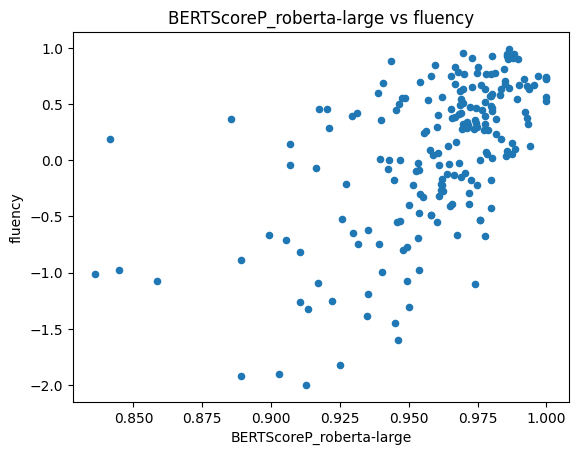

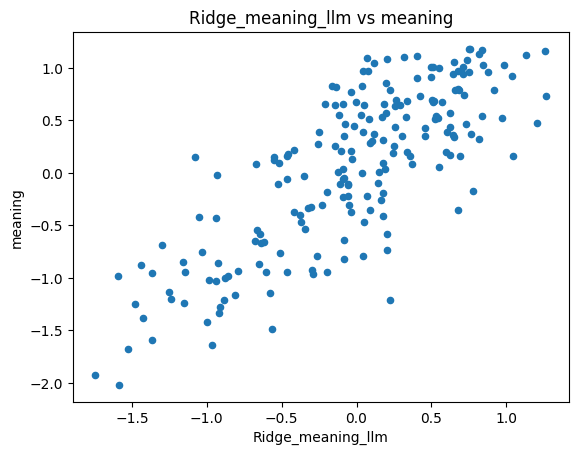

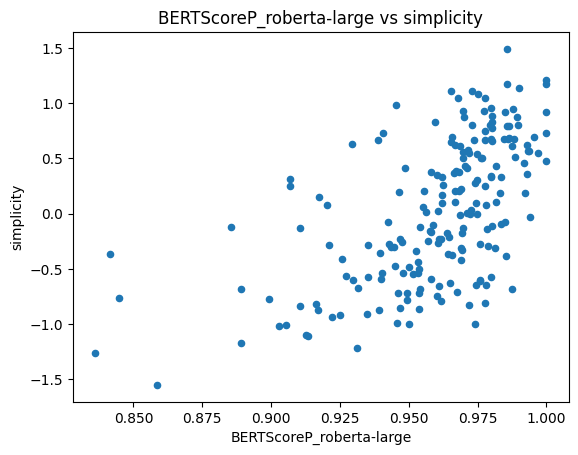

In [20]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
